# Supervised vs unsupervised learning

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn import datasets 
from sklearn import manifold

In [3]:
data = datasets.fetch_openml( 
    'mnist_784',  
    version=1,  
    return_X_y=True 
    ) 
pixel_values, targets = data 
targets = targets.astype(int)

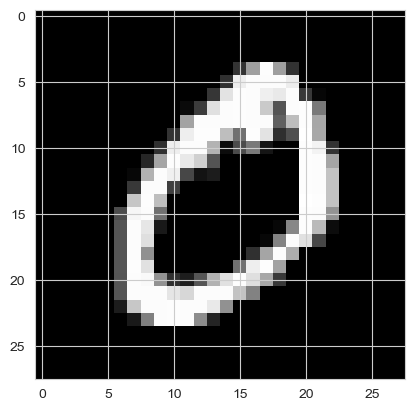

In [6]:
single_image = pixel_values.values[1, :].reshape(28, 28) 
plt.imshow(single_image, cmap='gray')
plt.show()

In [8]:
tsne = manifold.TSNE(n_components=2, random_state=42) 
transformed_data = tsne.fit_transform(pixel_values.values[:3000, :])

D:\develop_tools\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\develop_tools\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [9]:
tsne_df = pd.DataFrame( 
np.column_stack((transformed_data, targets[:3000])),  
columns=["x", "y", "targets"] 
) 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

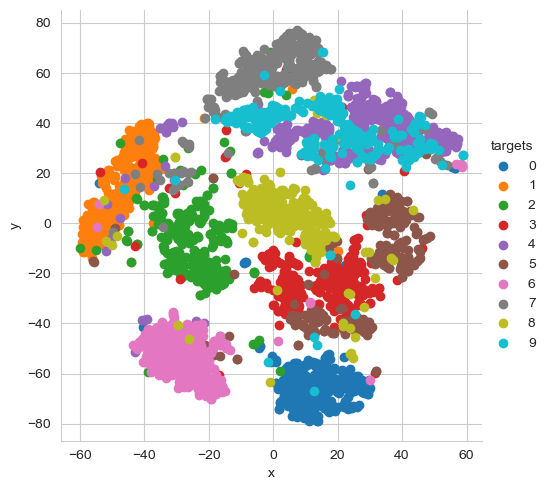

In [15]:
grid = sns.FacetGrid(tsne_df, hue="targets",height=5, aspect= 1) 
grid.map(plt.scatter, "x", "y").add_legend()
plt.show()